In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Capítulo 9

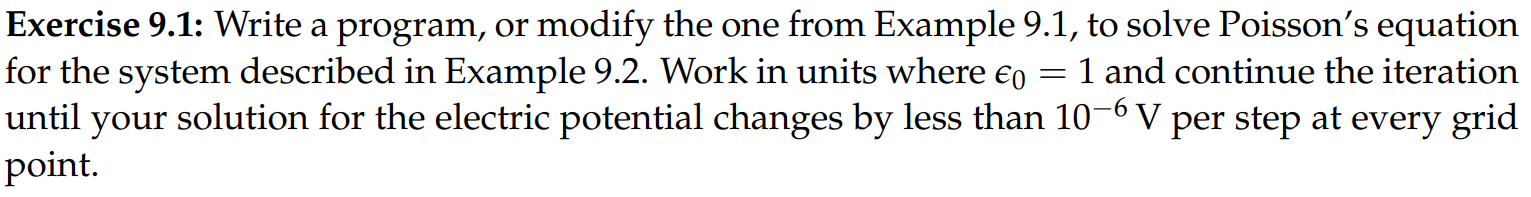

Número de iterações: 231


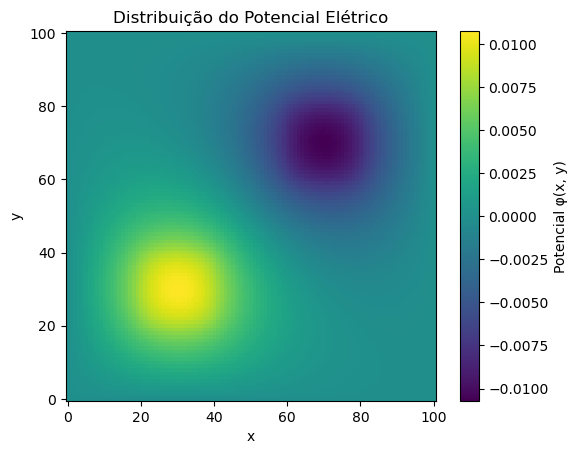

In [3]:
def poisson2d(phi: np.ndarray, solve: np.ndarray, f: np.ndarray, h: float, target: float=1e-6, w: float=0.9, N_max: int=10000) -> np.ndarray:
    """
    Resolve a equação de Poisson a 2D `nabla^2 phi = f` numa grelha de pontos equidistantes usando o método de Gauss-Seidel com sobrerelaxação começando com estimativa inicial `phi` e terminando quando o passo em cada ponto for menor que `target`.

    A matriz `solve` contém True caso o ponto esteja na área governada pela equação e contém False caso esteja na fronteira.
    """

    # Dimensões do problema
    Nx, Ny = phi.shape

    erro = 1.0
    c = 0
    while erro > target and c < N_max:
        oldphi = np.copy(phi)
        
        for i in range(Nx):
            for j in range(Ny):
                if solve[i, j]:
                    phi[i, j] = (1 + w) * 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] - f[i, j] * (h**2)) - w * phi[i, j]

        erro = np.max(abs(phi - oldphi))
        c += 1
    
    print(f'Número de iterações: {c}')
    return phi


# Parâmetros
L = 1.0
N = 100
h = L / N # Nota: Estou a considerar dx = dy

phi = np.zeros((N+1, N+1))
solve = np.full((N + 1, N + 1), True)

# Fonte
f = np.zeros((N+1, N+1))
for i in range(N + 1):
    for j in range(N + 1):
        if  20 <= i <= 40 and 20 <= j <= 40:
            f[i, j] = -1
        elif  60 <= i <= 80 and 60 <= j <= 80:
            f[i, j] = 1
        elif (i in [0, N]) or (j in [0, N]):
            solve[i, j] = False

sol = poisson2d(phi, solve, f, h)

plt.imshow(sol, origin = 'lower', cmap='viridis')
plt.colorbar(label='Potencial φ(x, y)')
plt.title('Distribuição do Potencial Elétrico')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

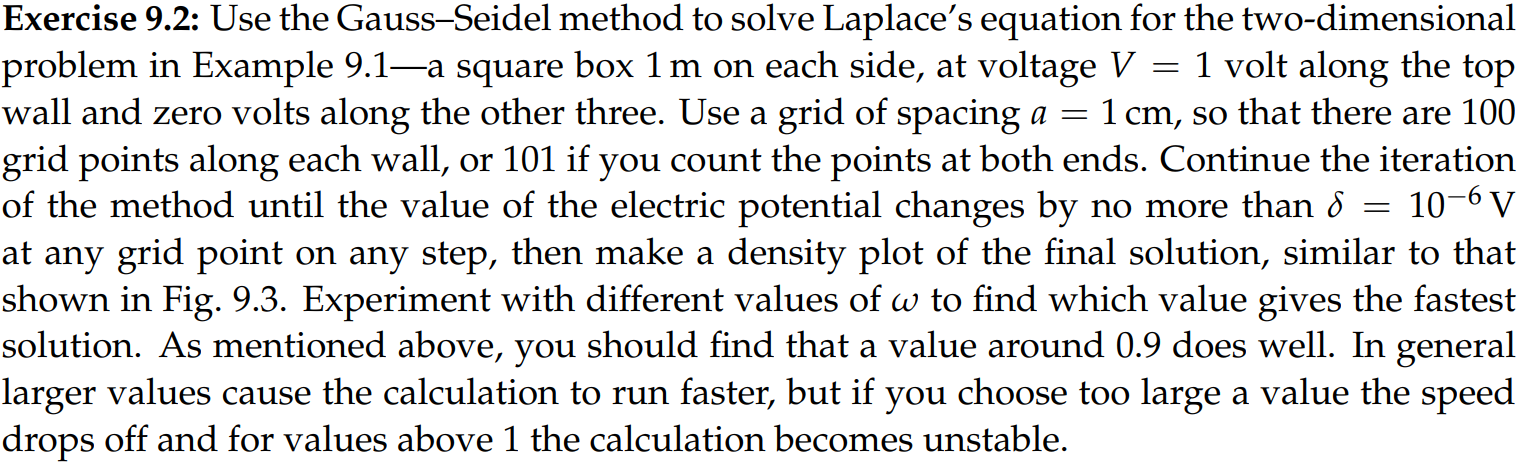

Número de iterações: 472


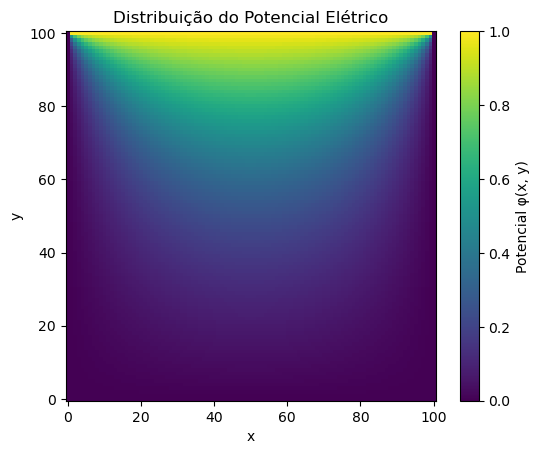

In [4]:
def laplace2d(phi: np.ndarray, solve: np.ndarray, target: float=1e-6, w: float=0.9, N_max: int=1000) -> np.ndarray:
    """
    Resolve a equação de Laplace a 2D `nabla^2 phi = 0` numa grelha de pontos equidistantes usando o método de Gauss-Seidel com sobrerelaxação começando com estimativa inicial `phi` e terminando quando o passo em cada ponto for menor que `eps`.

    A matriz `solve` contém True caso o ponto esteja na área governada pela equação e contém False caso esteja na fronteira.
    """

    # Dimensões do problema
    Nx, Ny = phi.shape

    erro = 1.0
    c = 0
    while erro > target and c <= N_max:
        oldphi = np.copy(phi)
        
        for i in range(Nx):
            for j in range(Ny):
                if solve[i, j]:
                    phi[i, j] = (1 + w) * 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]) - w * phi[i, j]

        erro = np.max(abs(phi - oldphi))
        c += 1
    
    print(f'Número de iterações: {c}')
    return phi

# Parâmetros
N = 100

phi = np.zeros((N+1, N+1))
solve = np.full((N + 1, N + 1), True)

# Condições do problema
for i in range(N + 1):
    for j in range(N + 1):
        if (i in [0, N]) or j == 0:
            solve[i, j] = False
        elif j == N:
            solve[i, j] = False
            phi[i, j] = 1

sol = laplace2d(phi, solve)

plt.imshow(sol.T, origin = 'lower', cmap='viridis')
plt.colorbar(label='Potencial φ(x, y)')
plt.title('Distribuição do Potencial Elétrico')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

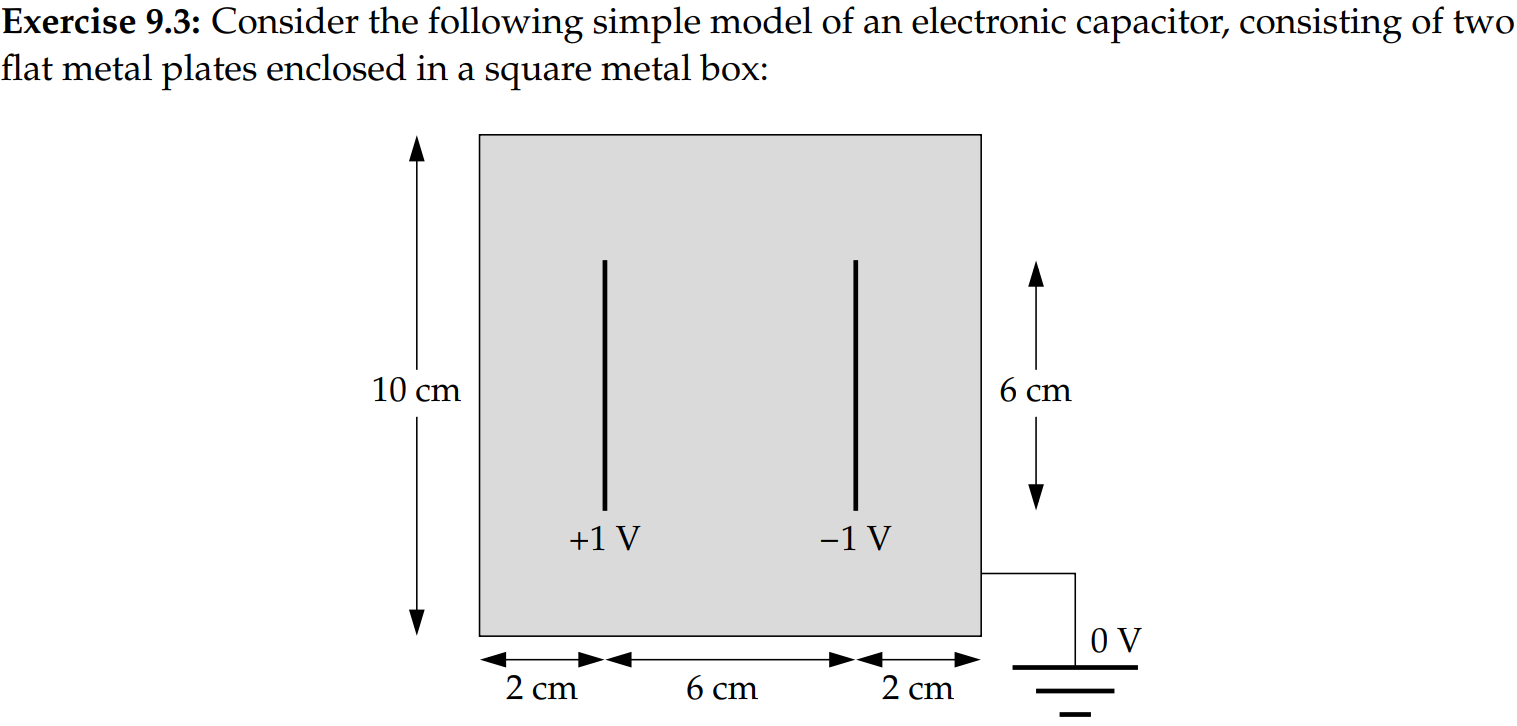

Número de iterações: 252


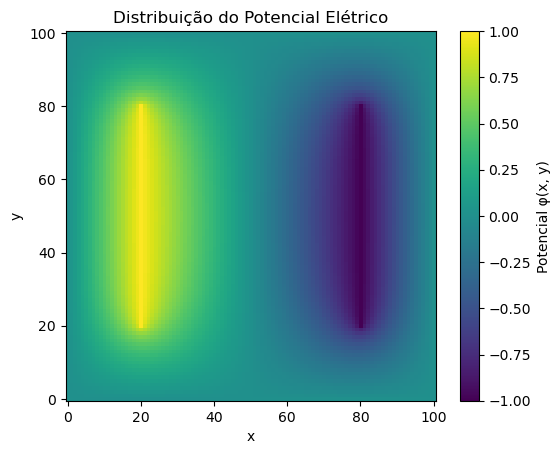

In [5]:
# Parâmetros
N = 100

phi = np.zeros((N+1, N+1))
solve = np.full((N + 1, N + 1), True)

# Condições do problema
for i in range(N + 1):
    for j in range(N + 1):
        if i == 20 and 20 <= j <= 80:
            solve[i, j] = False
            phi[i, j] = 1
        elif i == 80 and 20 <= j <= 80:
            solve[i, j] = False
            phi[i, j] = -1
        elif (i in [0, N]) or (j in [0, N]):
            solve[i, j] = 0

sol = laplace2d(phi, solve)

plt.imshow(sol.T, origin = 'lower', cmap='viridis')
plt.colorbar(label='Potencial φ(x, y)')
plt.title('Distribuição do Potencial Elétrico')
plt.xlabel('x')
plt.ylabel('y')
plt.show()